<a href="https://colab.research.google.com/github/sreehari59/NxtGen_AcciVision/blob/main/DPS_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Loading

In [97]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [110]:
url = 'https://opendata.muenchen.de/dataset/5e73a82b-7cfb-40cc-9b30-45fe5a3fa24e/resource/40094bd6-f82d-4979-949b-26c8dc00b9a7/download/monatszahlen2405_verkehrsunfaelle_export_31_05_24_r.csv'
df = pd.read_csv(url)

In [111]:
df.columns

Index(['MONATSZAHL', 'AUSPRAEGUNG', 'JAHR', 'MONAT', 'WERT', 'VORJAHRESWERT',
       'VERAEND_VORMONAT_PROZENT', 'VERAEND_VORJAHRESMONAT_PROZENT',
       'ZWOELF_MONATE_MITTELWERT'],
      dtype='object')

The column name translates to the following:
1. MONATSZAHL - MONTH NUMBER
2. AUSPRAEGUNG - PRONUNCIATION
3. JAHR - YEAR
4. MONAT - MONTH
5. WERT - VALUE
6. VORJAHRESWERT - PREVIOUS YEAR VALUE
7. VERAEND_VORMONAT_PROZENT - CHANGE PREVIOUS MONTH PERCENTAGE
8. VERAEND_VORJAHRESMONAT_PROZENT -CHANGE FROM PREVIOUS YEAR MONTH PERCENTAGE
9. ZWOELF_MONATE_MITTELWERT - TWELVE MONTHS AVERAGE







## EDA (Exploratory data analysis)

In [112]:
# Keeping only required columns
df.drop(['VORJAHRESWERT',
       'VERAEND_VORMONAT_PROZENT', 'VERAEND_VORJAHRESMONAT_PROZENT',
       'ZWOELF_MONATE_MITTELWERT'],axis=1, inplace=True)

In [113]:
# unique elements in AUSPRAEGUNG column
df["AUSPRAEGUNG"].unique()

array(['insgesamt', 'Verletzte und Getötete', 'mit Personenschäden'],
      dtype=object)

The unique values in the AUSPRAEGUNG column translates to as follows:
1. insgesamt - total
2. Verletzte und Getötete - injured and killed
3. mit Personenschäden - with personal injuries

In [114]:
# unique elements in MONATSZAHL column
df["MONATSZAHL"].unique()

array(['Alkoholunfälle', 'Fluchtunfälle', 'Verkehrsunfälle'], dtype=object)

The unique values in the MONATSZAHL column translates to as follows:
1. Alkoholunfälle - Alcohol accidents
2. Fluchtunfälle - escape accidents
3. Verkehrsunfälle - traffic accidents

In [115]:
# Checking the 'Summe' or total value for each of the category and type combination for the year 2020
df[(df["JAHR"]==2020) & (df["MONAT"]=="Summe")]

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
50,Alkoholunfälle,insgesamt,2020,Summe,430.0
372,Alkoholunfälle,Verletzte und Getötete,2020,Summe,250.0
694,Fluchtunfälle,insgesamt,2020,Summe,10024.0
1016,Fluchtunfälle,Verletzte und Getötete,2020,Summe,465.0
1338,Verkehrsunfälle,insgesamt,2020,Summe,38434.0
1660,Verkehrsunfälle,mit Personenschäden,2020,Summe,4918.0
1982,Verkehrsunfälle,Verletzte und Getötete,2020,Summe,5704.0


In [46]:
# Viewing the data for 'Alkoholunfälle' for the year 2020
df[(df["JAHR"]==2020) & (df["MONATSZAHL"]=="Alkoholunfälle")]

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
50,Alkoholunfälle,insgesamt,2020,Summe,430.0
51,Alkoholunfälle,insgesamt,2020,202001,28.0
52,Alkoholunfälle,insgesamt,2020,202002,40.0
53,Alkoholunfälle,insgesamt,2020,202003,27.0
54,Alkoholunfälle,insgesamt,2020,202004,26.0
55,Alkoholunfälle,insgesamt,2020,202005,40.0
56,Alkoholunfälle,insgesamt,2020,202006,49.0
57,Alkoholunfälle,insgesamt,2020,202007,58.0
58,Alkoholunfälle,insgesamt,2020,202008,46.0
59,Alkoholunfälle,insgesamt,2020,202009,46.0


In [ ]:
# Checking the number of rows of data for each year
for i in df["JAHR"].unique():
  print("Number of rows for year:",i,"is",df[df["JAHR"]==i].shape[0])

In [116]:
# Renaming the columns as to the values mentioned in the challenge
df = df.rename( columns = {
    'MONATSZAHL' : 'Category',
    'AUSPRAEGUNG': 'Accident_Type',
    'JAHR'       : 'Year',
    'MONAT'      : 'Month',
    'WERT'       : 'Value'
})

### Number of accidents per category till 2024 (Line Plot)

In [117]:
# Plotting the number of accidents per category from 2000 to 2024
fig = px.line(df[(df["Accident_Type"]=="insgesamt") & (df["Month"]=="Summe")],
              x="Year", y="Value", color='Category', markers=True)
fig.show()

From the above graph it is quite evident that 'Verkehrsunfälle' or traffic accidents are far more compared to 'Alkoholunfälle' and 'Fluchtunfälle ('Alcohol accidents', 'escape accidents' respectively)

### Number of accidents per category till 2024 (Bar Plot)

In [118]:
# Plotting the bar chart for the number of accidents per category from 2000 to 2024
fig = px.bar(df[(df["Accident_Type"]=="insgesamt") & (df["Month"]=="Summe")],
              x="Year", y="Value", color='Category', title="Number of Accidents over the years")
fig.show()

## Reducing Analysis till 2020 (inclusive)

In [121]:
old_df = df.copy()
df = df[df["Year"] < 2021]
print("Shape of initial df:",old_df.shape)
print("Shape of required df:",df.shape)

Shape of initial df: (2254, 5)
Shape of required df: (1904, 5)


In [122]:
# Getting a glance into the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1904 entries, 50 to 2253
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Category       1904 non-null   object 
 1   Accident_Type  1904 non-null   object 
 2   Year           1904 non-null   int64  
 3   Month          1904 non-null   object 
 4   Value          1904 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 89.2+ KB


In [123]:
# Getting to know the mean, min=max values of the numeric columns
df.describe()

,Year,Value
count,1904.000000,1904.000000
mean,2010.036765,1408.725315
std,6.037517,4549.574084
min,2000.000000,0.000000
25%,2005.000000,41.000000
50%,2010.000000,396.500000
75%,2015.000000,860.250000
max,2020.000000,46988.000000


In [124]:
# Checking for null values
df.isnull().any()

Category         False
Accident_Type    False
Year             False
Month            False
Value            False
dtype: bool

In [125]:
# Remove null values
df = df.dropna()

In [126]:
# Creating a new dataframe to store the total or 'Summe' from Month column
total_df = df[df["Month"]=="Summe"]

In [127]:
# Removing the total or 'Summe' from Month column
df = df[df["Month"]!="Summe"]

In [128]:
df.head()

,Category,Accident_Type,Year,Month,Value
51,Alkoholunfälle,insgesamt,2020,202001,28.0
52,Alkoholunfälle,insgesamt,2020,202002,40.0
53,Alkoholunfälle,insgesamt,2020,202003,27.0
54,Alkoholunfälle,insgesamt,2020,202004,26.0
55,Alkoholunfälle,insgesamt,2020,202005,40.0


In [129]:
# Replacing Month column with integer month values
df['Month'] = df['Month'].str[-2:]
df['Month'] = df['Month'].astype(int)

In [130]:
df.shape

(1764, 5)

Category
Verkehrsunfälle    756
Alkoholunfälle     504
Fluchtunfälle      504
Name: count, dtype: int64


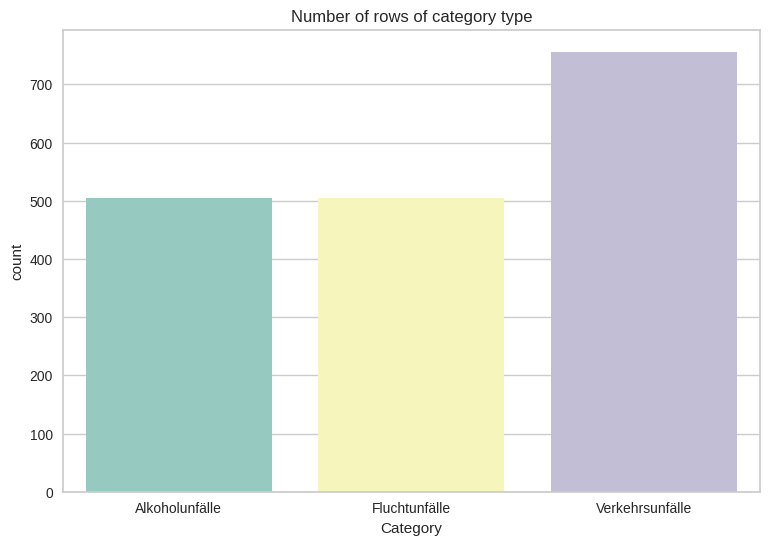

In [131]:
# Total number of rows per category
print(df["Category"].value_counts())
sns.countplot(x ='Category', data = df, palette = "Set3")
plt.title("Number of rows of category type")
plt.gcf().set_size_inches(9,6)

Accident_Type
insgesamt                 756
Verletzte und Getötete    756
mit Personenschäden       252
Name: count, dtype: int64


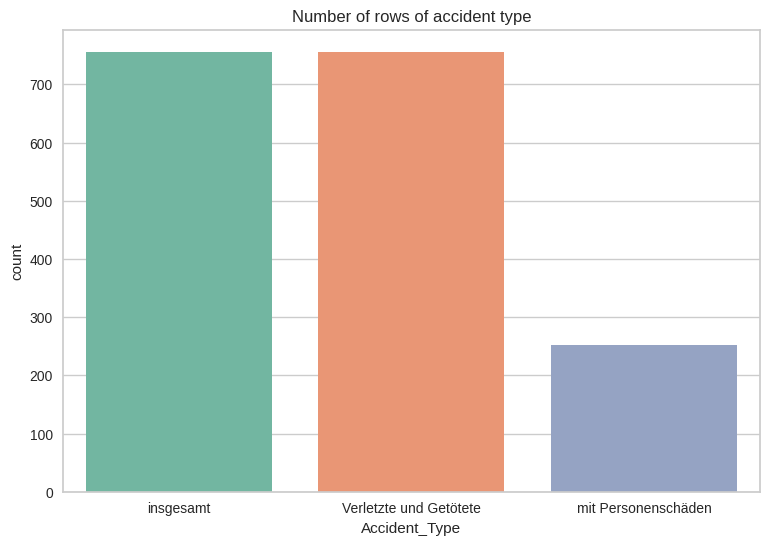

In [133]:
print(df["Accident_Type"].value_counts())
sns.countplot(x ='Accident_Type', data = df, palette = "Set2")
plt.title("Number of rows of accident type")
plt.gcf().set_size_inches(9,6)

## Model to Forecast

In [13]:
# new_df = df[(df["JAHR"] < 2021) & (df["AUSPRAEGUNG"]=="insgesamt")]
new_df = df[(df["JAHR"] < 2021)]
new_df.head(2)

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
50,Alkoholunfälle,insgesamt,2020,Summe,430.0
51,Alkoholunfälle,insgesamt,2020,202001,28.0


In [14]:
print("Size of required data: ",new_df.shape)

Size of required data:  (1904, 5)


In [15]:
# Remove null values
new_df = new_df.dropna()
print("Size of required data after dropping null values: ",new_df.shape)

Size of required data after dropping null values:  (1904, 5)


In [16]:
# Remove 'Summe' value from the MONAT column
new_df = new_df[new_df["MONAT"]!="Summe"]
new_df.head(2)

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
51,Alkoholunfälle,insgesamt,2020,202001,28.0
52,Alkoholunfälle,insgesamt,2020,202002,40.0


In [26]:
# Get only month numbers in Month column
new_df['NUR_MONAT'] = new_df['MONAT'].str[-2:]
new_df.drop("MONAT",axis=1, inplace=True)
new_df['NUR_MONAT'] = new_df['NUR_MONAT'].astype(int)

,MONATSZAHL,AUSPRAEGUNG,JAHR,WERT,NUR_MONAT
51,Alkoholunfälle,insgesamt,2020,28.0,01
52,Alkoholunfälle,insgesamt,2020,40.0,02
53,Alkoholunfälle,insgesamt,2020,27.0,03
54,Alkoholunfälle,insgesamt,2020,26.0,04
55,Alkoholunfälle,insgesamt,2020,40.0,05
...,...,...,...,...,...
2249,Verkehrsunfälle,Verletzte und Getötete,2000,647.0,08
2250,Verkehrsunfälle,Verletzte und Getötete,2000,675.0,09
2251,Verkehrsunfälle,Verletzte und Getötete,2000,615.0,10
2252,Verkehrsunfälle,Verletzte und Getötete,2000,578.0,11


In [29]:
new_df.dtypes

MONATSZAHL      object
AUSPRAEGUNG     object
JAHR             int64
WERT           float64
NUR_MONAT        int64
dtype: object

In [ ]:
!pip install pycaret

In [30]:
from pycaret.regression import *
new_df_setup = setup(new_df, target = 'WERT', session_id = 123)

,Description,Value
0,Session id,123
1,Target,WERT
2,Target type,Regression
3,Original data shape,"(1764, 5)"
4,Transformed data shape,"(1764, 9)"
5,Transformed train set shape,"(1234, 9)"
6,Transformed test set shape,"(530, 9)"
7,Numeric features,2
8,Categorical features,2
9,Preprocess,True


In [31]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,54.8438,10418.4025,100.5519,0.9921,0.4938,0.3883,0.1250
lightgbm,Light Gradient Boosting Machine,57.6425,11815.2256,105.8566,0.9911,0.5259,0.3556,0.4790
rf,Random Forest Regressor,57.7446,14107.1635,117.0581,0.9893,0.2216,0.1653,0.3630
gbr,Gradient Boosting Regressor,69.2668,15256.3585,121.9660,0.9883,0.5794,0.5318,0.1530
et,Extra Trees Regressor,61.5541,15419.4706,122.5500,0.9882,0.2308,0.1745,0.4790
dt,Decision Tree Regressor,70.5964,22858.0972,148.2889,0.9826,0.2751,0.2015,0.0740
ada,AdaBoost Regressor,92.1446,29840.7843,171.2574,0.9770,0.3405,0.2913,0.1320
knn,K Neighbors Regressor,386.3358,375024.2469,607.3967,0.7125,1.2135,2.9300,0.0820
llar,Lasso Least Angle Regression,501.9996,377477.3561,612.9320,0.7048,1.8446,9.7065,0.0740
ridge,Ridge Regression,501.9435,377473.8728,612.9258,0.7048,1.8439,9.7071,0.1150


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [32]:
pred = df[df["JAHR"]==2021]
pred

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
37,Alkoholunfälle,insgesamt,2021,Summe,383.0
38,Alkoholunfälle,insgesamt,2021,202101,16.0
39,Alkoholunfälle,insgesamt,2021,202102,14.0
40,Alkoholunfälle,insgesamt,2021,202103,24.0
41,Alkoholunfälle,insgesamt,2021,202104,16.0
...,...,...,...,...,...
1977,Verkehrsunfälle,Verletzte und Getötete,2021,202108,533.0
1978,Verkehrsunfälle,Verletzte und Getötete,2021,202109,680.0
1979,Verkehrsunfälle,Verletzte und Getötete,2021,202110,561.0
1980,Verkehrsunfälle,Verletzte und Getötete,2021,202111,430.0


In [33]:
pred = pred.dropna()
pred = pred[pred["MONAT"]!="Summe"]
pred['NUR_MONAT'] = pred['MONAT'].str[-2:]
pred.drop("MONAT",axis=1, inplace=True)
pred['NUR_MONAT'] = pred['NUR_MONAT'].astype(int)
pred

,MONATSZAHL,AUSPRAEGUNG,JAHR,WERT,NUR_MONAT
38,Alkoholunfälle,insgesamt,2021,16.0,1
39,Alkoholunfälle,insgesamt,2021,14.0,2
40,Alkoholunfälle,insgesamt,2021,24.0,3
41,Alkoholunfälle,insgesamt,2021,16.0,4
42,Alkoholunfälle,insgesamt,2021,24.0,5
...,...,...,...,...,...
1977,Verkehrsunfälle,Verletzte und Getötete,2021,533.0,8
1978,Verkehrsunfälle,Verletzte und Getötete,2021,680.0,9
1979,Verkehrsunfälle,Verletzte und Getötete,2021,561.0,10
1980,Verkehrsunfälle,Verletzte und Getötete,2021,430.0,11


In [35]:
predict_model(best, data = pred)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,87.7978,35242.0938,187.7288,0.9690,0.4404,0.3837


,MONATSZAHL,AUSPRAEGUNG,JAHR,NUR_MONAT,WERT,prediction_label
38,Alkoholunfälle,insgesamt,2021,1,16.0,44.781574
39,Alkoholunfälle,insgesamt,2021,2,14.0,42.637047
40,Alkoholunfälle,insgesamt,2021,3,24.0,26.259575
41,Alkoholunfälle,insgesamt,2021,4,16.0,15.260848
42,Alkoholunfälle,insgesamt,2021,5,24.0,39.930817
...,...,...,...,...,...,...
1977,Verkehrsunfälle,Verletzte und Getötete,2021,8,533.0,589.676941
1978,Verkehrsunfälle,Verletzte und Getötete,2021,9,680.0,625.169128
1979,Verkehrsunfälle,Verletzte und Getötete,2021,10,561.0,575.799133
1980,Verkehrsunfälle,Verletzte und Getötete,2021,11,430.0,350.885193
